In [1]:
import scipy.cluster.hierarchy as shc
import numpy as np
from matplotlib import cm, colors
from matplotlib import pyplot as plt
import pandas as pd
from plotnine.data import mtcars
from sklearn.preprocessing import scale
plt.rcParams['axes.facecolor'] = 'w'
plt.rc('axes', axisbelow=True)


df = mtcars.set_index('name')
df.loc[:, :] = scale(df.values)
df


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,-0.881917,1.208941,0.430331,0.746967
Mazda RX4 Wag,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,-0.881917,1.208941,0.430331,0.746967
Datsun 710,0.456737,-1.244457,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1.133893,1.208941,0.430331,-1.140108
Hornet 4 Drive,0.220730,-0.106668,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1.133893,-0.827170,-0.946729,-1.140108
Hornet Sportabout,-0.234427,1.031121,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.881917,-0.827170,-0.946729,-0.511083
Valiant,-0.335572,-0.106668,-0.046906,-0.617748,-1.589643,0.252064,1.348220,1.133893,-0.827170,-0.946729,-1.140108
Duster 360,-0.976163,1.031121,1.059772,1.456847,-0.734549,0.366285,-1.142114,-0.881917,-0.827170,-0.946729,0.746967
Merc 240D,0.726459,-1.244457,-0.688779,-1.254944,0.177551,-0.028296,1.223135,1.133893,-0.827170,0.430331,-0.511083
Merc 230,0.456737,-1.244457,-0.737144,-0.765933,0.614599,-0.069830,2.871986,1.133893,-0.827170,0.430331,-0.511083


## 横向树形图

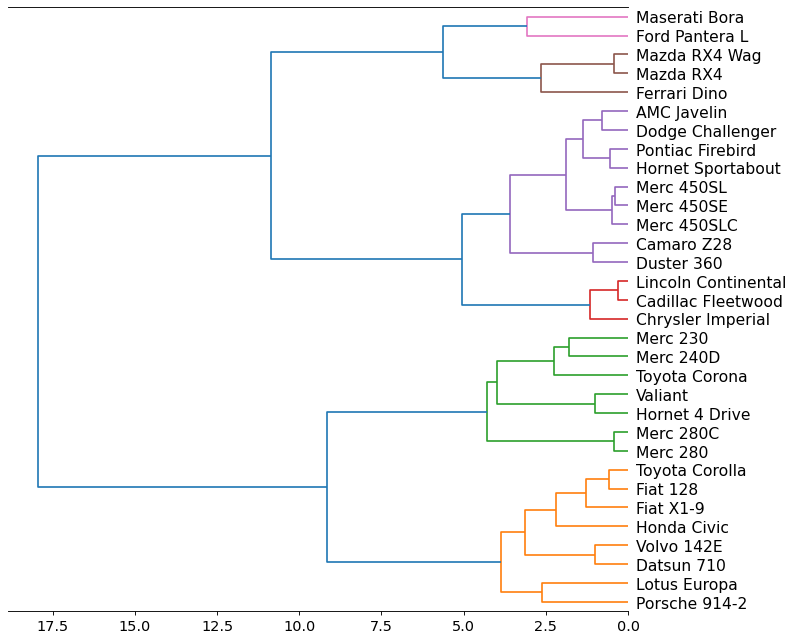

In [2]:
fig = plt.figure(figsize=(10, 10), dpi=80)
dend = shc.dendrogram(shc.linkage(df, method='ward'), orientation='left',
                      labels=list(df.index.values), color_threshold=5
                      )
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=14)
#plt.grid(color='gray',which='major', axis='x',linestyle='--')

ax = plt.gca()
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('k')
ax.spines['bottom'].set_color('k')

# plt.savefig('树状图1.pdf')
plt.show()


## 纵向树形图

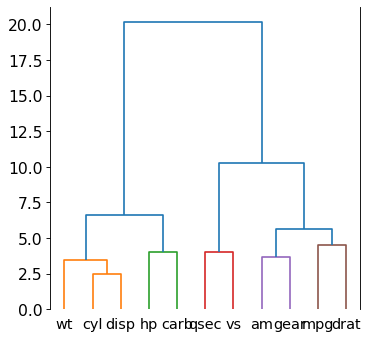

In [3]:
fig = plt.figure(figsize=(5, 5), dpi=80)
#plt.title("USArrests Dendograms", fontsize=22)
dend = shc.dendrogram(shc.linkage(df.values.T, method='ward'), orientation='top',
                      labels=list(df.columns.values), color_threshold=5,
                      )
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=14)
#plt.grid(color='gray',which='major', axis='y',linestyle='--')

ax = plt.gca()
ax.spines['left'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')

# plt.savefig('树状图2.pdf')
plt.show()
